In [189]:
import numpy as np
import pandas as pd

In [190]:
df = pd.read_csv('/content/spam.csv', encoding='latin1')

In [191]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1716,ham,Sorry about earlier. Putting out fires.Are you...,NaN,NaN,NaN
223,ham,U say leh... Of course nothing happen lar. Not...,NaN,NaN,NaN
5332,ham,I think steyn surely get one wicket:),NaN,NaN,NaN
1296,ham,Sure! I am driving but will reach my destinati...,NaN,NaN,NaN
4975,ham,You are gorgeous! keep those pix cumming :) th...,NaN,NaN,NaN


In [192]:
df.shape

(5572, 5)

In [193]:
#1.Datacleaning
#2.EDA
#3.Text Preprocessing
#4.Model Building
#5.Evaluation
#6.Improvement
#7.Website
#8.Deploy


#Data Cleaning

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [195]:
#Drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [196]:
df.sample(5)

,v1,v2
4048,ham,Yeah that's the impression I got
1559,ham,Single line with a big meaning::::: \Miss anyt...
1828,ham,May i call You later Pls
4661,ham,Ladies first and genus second k .
5330,ham,Dude im no longer a pisces. Im an aquarius now.


In [197]:
#Renaming the cols
df.rename(columns={'v1':'target', 'v2':'text'},inplace=True)
df.sample(5)

,target,text
3924,ham,As if i wasn't having enough trouble sleeping.
4188,ham,"Well the general price is &lt;#&gt; /oz, let ..."
387,ham,Mm that time you dont like fun
2388,ham,wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...
4596,ham,Full heat pa:-) i have applyed oil pa.


In [198]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [199]:
df['target']=encoder.fit_transform(df['target'])

In [200]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [201]:
#Misssing values
df.isnull().sum()

,0
target,0
text,0


In [202]:
# Check for duplicate values
df.duplicated().sum()

np.int64(403)

In [203]:
#Remove duplicates
df = df.drop_duplicates(keep='first')

In [204]:
df.duplicated().sum()

np.int64(0)

In [205]:
df.shape

(5169, 2)

#2.EDA

In [206]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [207]:
df['target'].value_counts()

,count
target,
0,4516
1,653


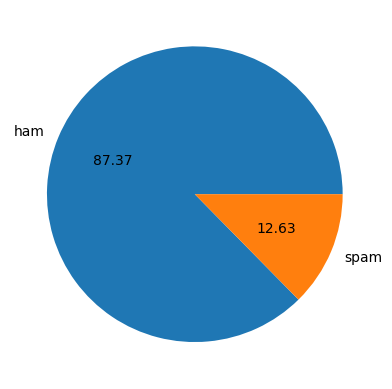

In [208]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [209]:
#Data is imbalanced

In [210]:
import nltk

In [211]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [212]:
df['num_characters'] = df['text'].apply(len)

In [213]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [214]:
#No.of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [215]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [216]:
df['num_sentences']=df['text'].apply(lambda x:(nltk.sent_tokenize(x)))

In [217]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go until jurong point, crazy.., Available onl..."
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok lar..., Joking wif u oni...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,[Free entry in 2 a wkly comp to win FA Cup fin...
3,0,U dun say so early hor... U c already then say...,49,13,[U dun say so early hor... U c already then sa...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah I don't think he goes to usf, he lives ar..."


In [218]:
df[['num_characters','num_words','num_sentences']].describe(include='all')

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169
unique,NaN,NaN,5158
top,NaN,NaN,"[If you don't, your prize will go to another c..."
freq,NaN,NaN,2
mean,78.977945,18.455794,NaN
std,58.236293,13.324758,NaN
min,2.000000,1.000000,NaN
25%,36.000000,9.000000,NaN
50%,60.000000,15.000000,NaN
75%,117.000000,26.000000,NaN


In [219]:
#HAM
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe(include='all')

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516
unique,NaN,NaN,4516
top,NaN,NaN,"[Rofl., Its true to its name]"
freq,NaN,NaN,1
mean,70.459256,17.123782,NaN
std,56.358207,13.493970,NaN
min,2.000000,1.000000,NaN
25%,34.000000,8.000000,NaN
50%,52.000000,13.000000,NaN
75%,90.000000,22.000000,NaN


In [220]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe(include='all')

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653
unique,NaN,NaN,642
top,NaN,NaN,"[Eerie Nokia tones 4u, rply TONE TITLE to 8007..."
freq,NaN,NaN,2
mean,137.891271,27.667688,NaN
std,30.137753,7.008418,NaN
min,13.000000,2.000000,NaN
25%,132.000000,25.000000,NaN
50%,149.000000,29.000000,NaN
75%,157.000000,32.000000,NaN


In [221]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

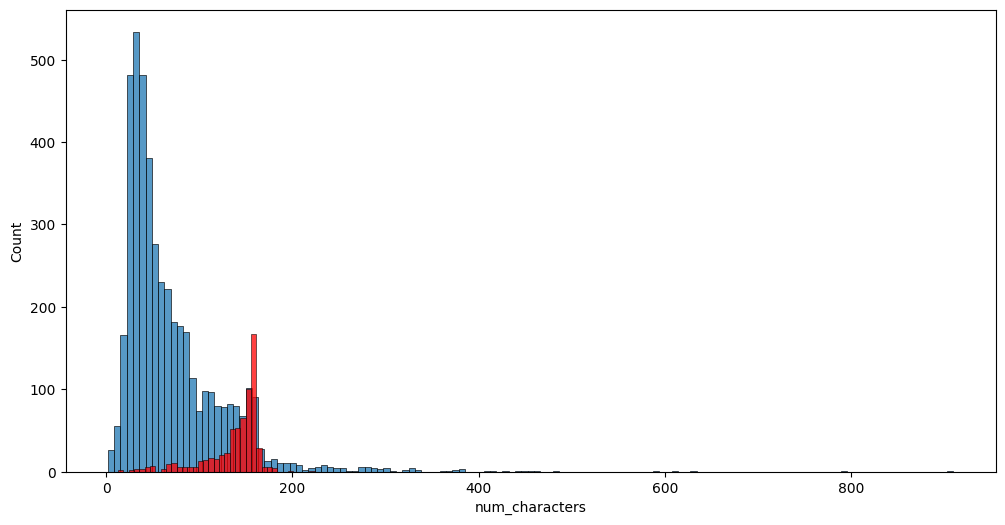

In [222]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

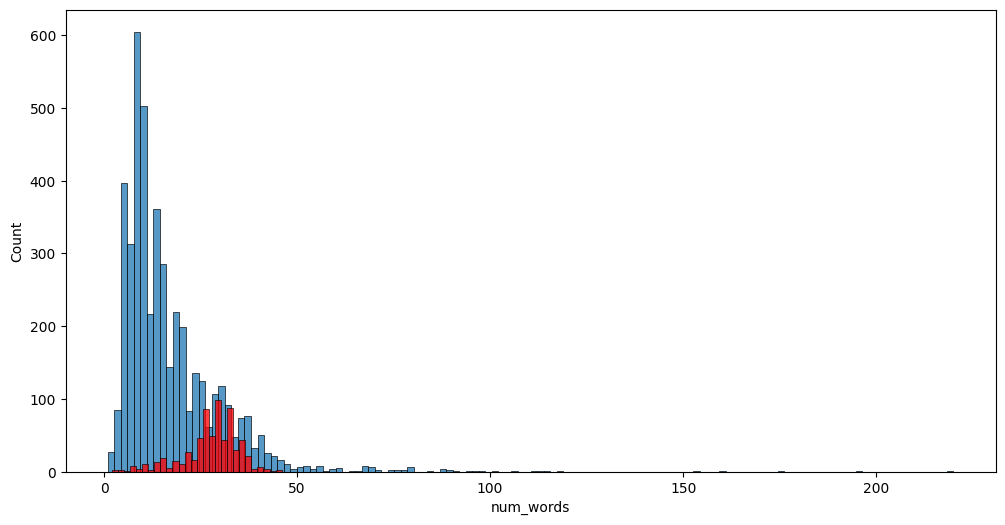

In [223]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

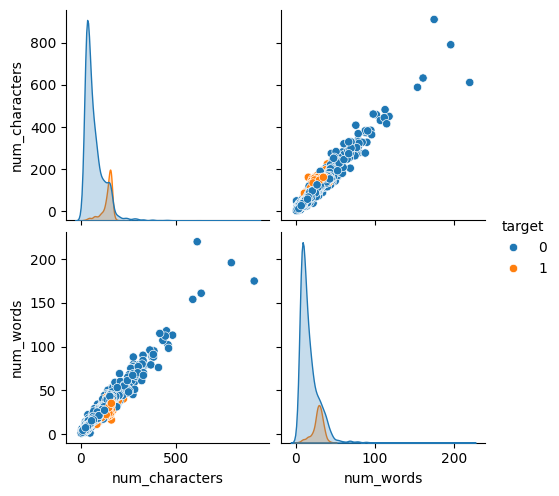

In [224]:
sns.pairplot(df,hue='target')

<Axes: >

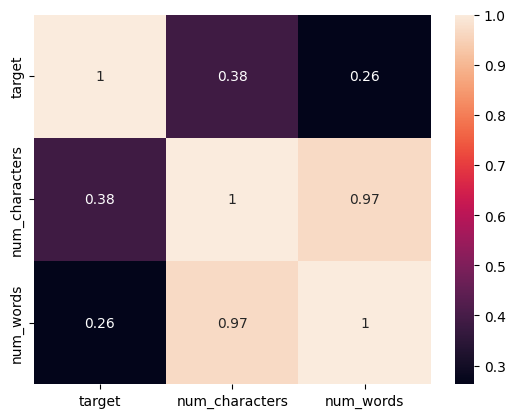

In [225]:
#df.corr()
df_numeric = df.select_dtypes(include='number')
sns.heatmap(df_numeric.corr(),annot=True)


**3. Data preprocessing**
1.Lower case
2.Tokenization
3.Removing special Characters
4.Stemming


In [226]:
from tkinter.constants import Y
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)


  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [227]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [228]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [229]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [230]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [231]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [232]:
df['transformed_text'] = df['text'].apply(transform_text)

In [233]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go until jurong point, crazy.., Available onl...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok lar..., Joking wif u oni...]",ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,[Free entry in 2 a wkly comp to win FA Cup fin...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,[U dun say so early hor... U c already then sa...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah I don't think he goes to usf, he lives ar...",nah think goe usf live around though


In [234]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500, min_font_size=10,background_color='white')

In [235]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

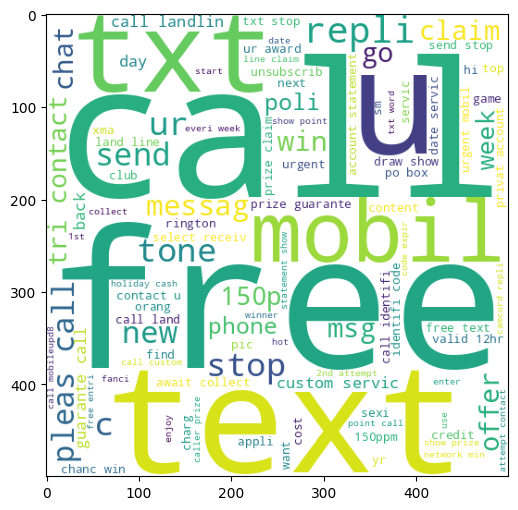

In [236]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [237]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

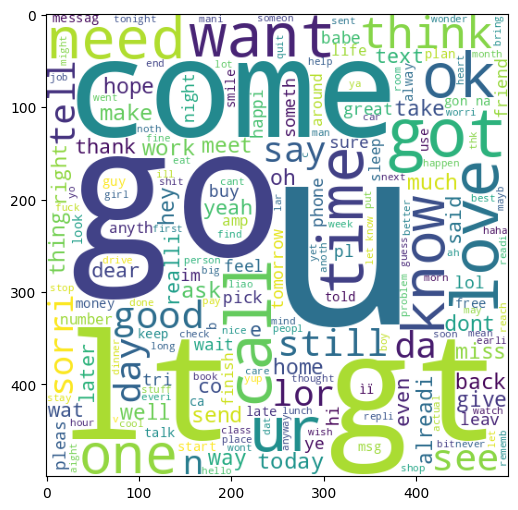

In [238]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [239]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go until jurong point, crazy.., Available onl...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok lar..., Joking wif u oni...]",ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,[Free entry in 2 a wkly comp to win FA Cup fin...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,[U dun say so early hor... U c already then sa...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah I don't think he goes to usf, he lives ar...",nah think goe usf live around though


In [240]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [241]:
len(spam_corpus)

9939

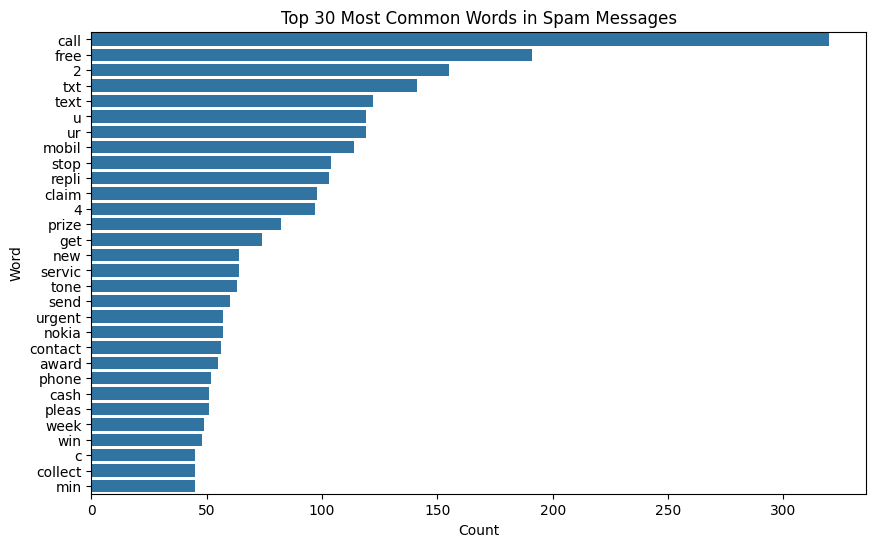

In [242]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 30 most common words
top_words = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
df_top_words = pd.DataFrame(top_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='word', data=df_top_words)
plt.title("Top 30 Most Common Words in Spam Messages")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

In [243]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [244]:
len(ham_corpus)

35404

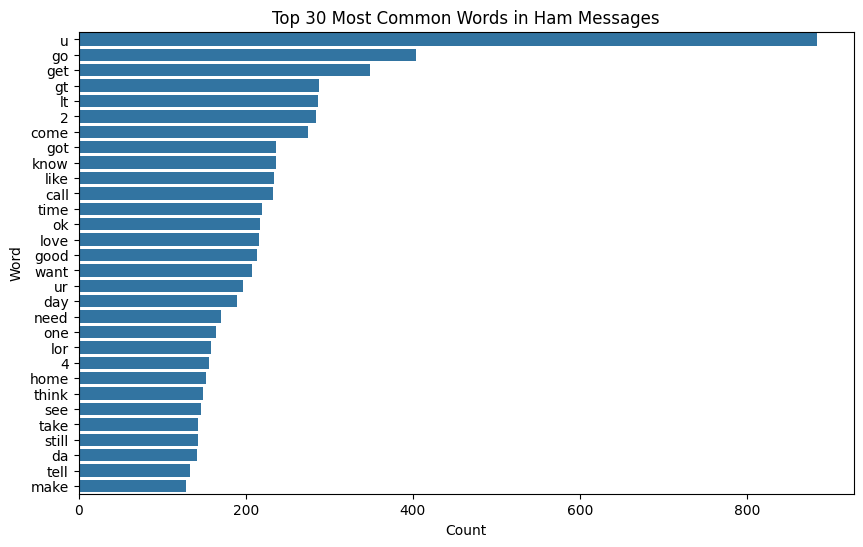

In [245]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 30 most common words
top_words = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
df_top_words = pd.DataFrame(top_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='word', data=df_top_words)
plt.title("Top 30 Most Common Words in Ham Messages")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

In [246]:
#Text vectorizer
# Using Bag of words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go until jurong point, crazy.., Available onl...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok lar..., Joking wif u oni...]",ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,[Free entry in 2 a wkly comp to win FA Cup fin...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,[U dun say so early hor... U c already then sa...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah I don't think he goes to usf, he lives ar...",nah think goe usf live around though


#4.Model Building

In [291]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [292]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [293]:
X.shape

(5169, 6708)

In [294]:
y = df['target'].values

In [295]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [296]:
from sklearn.model_selection import train_test_split

In [297]:
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [298]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [299]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [300]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [301]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [302]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [303]:
#tfidf ==> MNB

In [304]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [305]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty = '11')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [306]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost': abc,
    'Bgc' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [307]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [308]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9264990328820116, 0.7421875)

In [309]:
#Applying stacking
estimators = [('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [310]:
from sklearn.ensemble import StackingClassifier

In [311]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [290]:

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835589941972921
Precision 0.9689922480620154


In [312]:
import pickle
pickle.dump(tfidf,open('vectorizer.pk1','wb'))
pickle.dump(mnb,open('model.pk1','wb'))